In [7]:
# Importing libraries
import pandas as pd

In [8]:
# we can set numbers for how many rows and columns will be displayed
pd.set_option('display.min_rows', 10) #default will be 10
pd.set_option('display.max_columns', 20)

In [9]:
# read csv file

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_store_customer_data.csv')
df.head(3)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60


# Task 1

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# •	Find out the number of rows and columns in your data frame by using function shape
print("Data Shape: ", df.shape)
print("Rows in Data: ", df.shape[0])
print("Columns in Data: ", df.shape[1])

Data Shape:  (2512, 11)
Rows in Data:  2512
Columns in Data:  11


In [12]:
# Find unique values in columns ‘Payment_method’ and ‘Employees_status’
print(df['Payment_method'].unique())
print(df['Employees_status'].unique())

['Other' 'Card' 'PayPal']
['Unemployment' 'self-employed' 'workers' 'Employees' nan]


In [13]:
# Drop rows where Employees_status is unemployment and Payment_method is other.
df[(df['Employees_status'] == 'Unemployment') & (df['Payment_method'] == 'Other')].index
df.shape

(2512, 11)

In [14]:
#Pass it to the drop function to delete the rows
df.drop(df[(df['Employees_status'] == 'Unemployment') & (df['Payment_method'] == 'Other')].index, inplace=True)
df.shape

(2454, 11)

# Task 2

In [15]:
#Replace each unique value in nominal feature by a numeric value (manual encoding).
df['Payment_method'].value_counts()

,count
Payment_method,
PayPal,1168
Card,749
Other,537


In [16]:
df['Payment_method'] = df['Payment_method'].replace({'PayPal': 0, 'Card': 1, 'Other' : 2})

<ipython-input-16-ebd6fee39a61>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Payment_method'] = df['Payment_method'].replace({'PayPal': 0, 'Card': 1, 'Other' : 2})


#It is easier to use the replace function when the number of categories is small. If the number



In [17]:
# Convert categorical data to numerical data using cat.codes
df['State_names'] = df['State_names'].astype('category')
df['State_names'] = df['State_names'].cat.codes

##Ordinal Encoding (Scikitlearn library)

In [19]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe = OrdinalEncoder()
df['State_names'] = oe.fit_transform(df[['State_names']])
df

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1,1/1/2019,151201,Male,49.0,Single,12.0,Basic,self-employed,1,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,30.0,Basic,workers,0,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,45.0,Platinum,workers,1,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,6.0,Basic,self-employed,1,0.0,NaN
5,1/3/2019,151205,Male,71.0,Single,10.0,Basic,Employees,0,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,39.0,Platinum,self-employed,1,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,10.0,Silver,self-employed,0,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,39.0,Basic,workers,0,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,31.0,Basic,Employees,0,0.0,1909.77


# Task 3
#OneHotEncoding No Natural Order (Binary Coding)

In [20]:
# Convery ordinal categorical feature to numeric using dummy encoding
# Get one hot encoding of columns 'Segment'
one_hot = pd.get_dummies(df['Segment'])
# Drop column 'Segment'as it is now encoded
df = df.drop('Segment',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.head(3)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Basic,Gold,Missing,Platinum,Silver
1,1/1/2019,151201,Male,49.0,Single,12.0,self-employed,1,0.0,544.04,True,False,False,False,False
2,1/1/2019,151202,Male,63.0,Married,30.0,workers,0,1.0,1572.60,True,False,False,False,False
3,1/1/2019,151203,NaN,18.0,Single,45.0,workers,1,1.0,1199.79,False,False,False,True,False


##Segment is One Hot Coded into columns = 'Basic', 'Gold', 'Missing', 'Platinum', 'Silver'

# Task 4
#Variance, Covariance, Correlation

Variance is a measure of spread of data from mean.
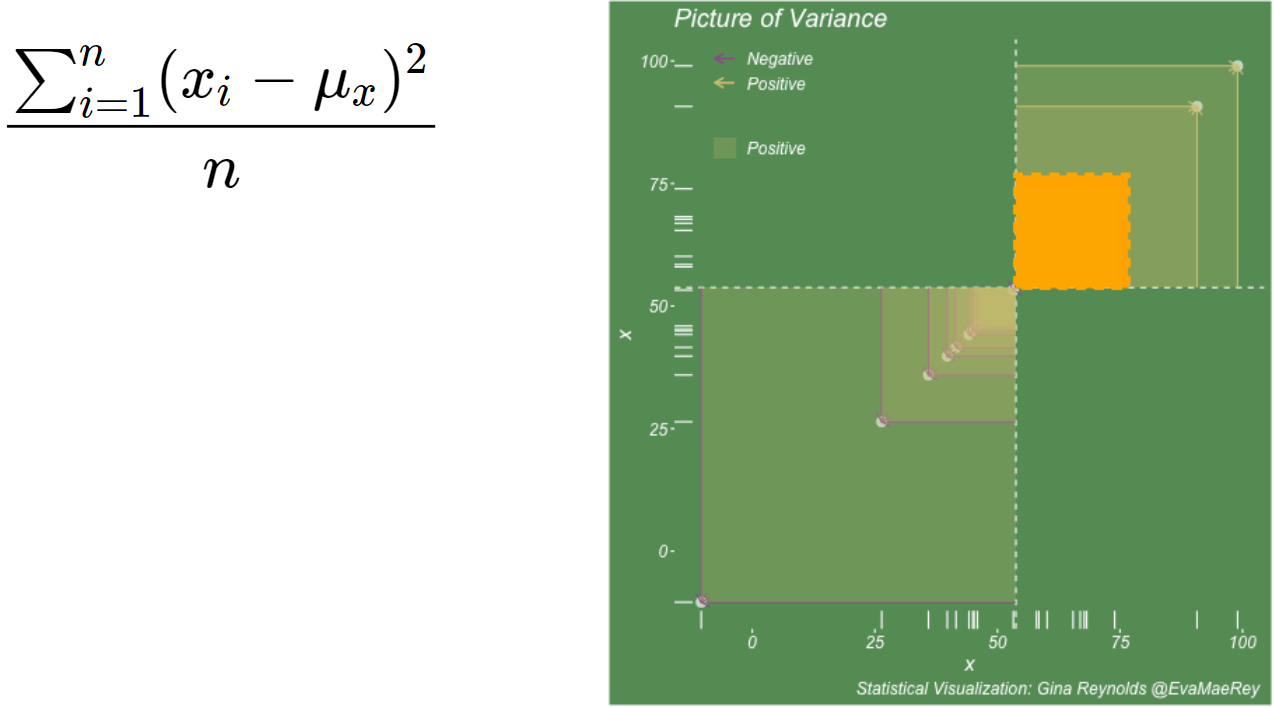

In [25]:
df.var(numeric_only=True) #include only numeric variables

,0
Transaction_ID,524244.313969
Age,332.541050
State_names,205.313399
Payment_method,0.628924
Referal,0.227239
Amount_spent,772731.418096
Basic,0.247943
Gold,0.087943
Missing,0.072835
Platinum,0.144580


#Covariance is a measure of the relationship between 2 variables that is scale dependent, i.e., how much will a variable change when another variable changes.

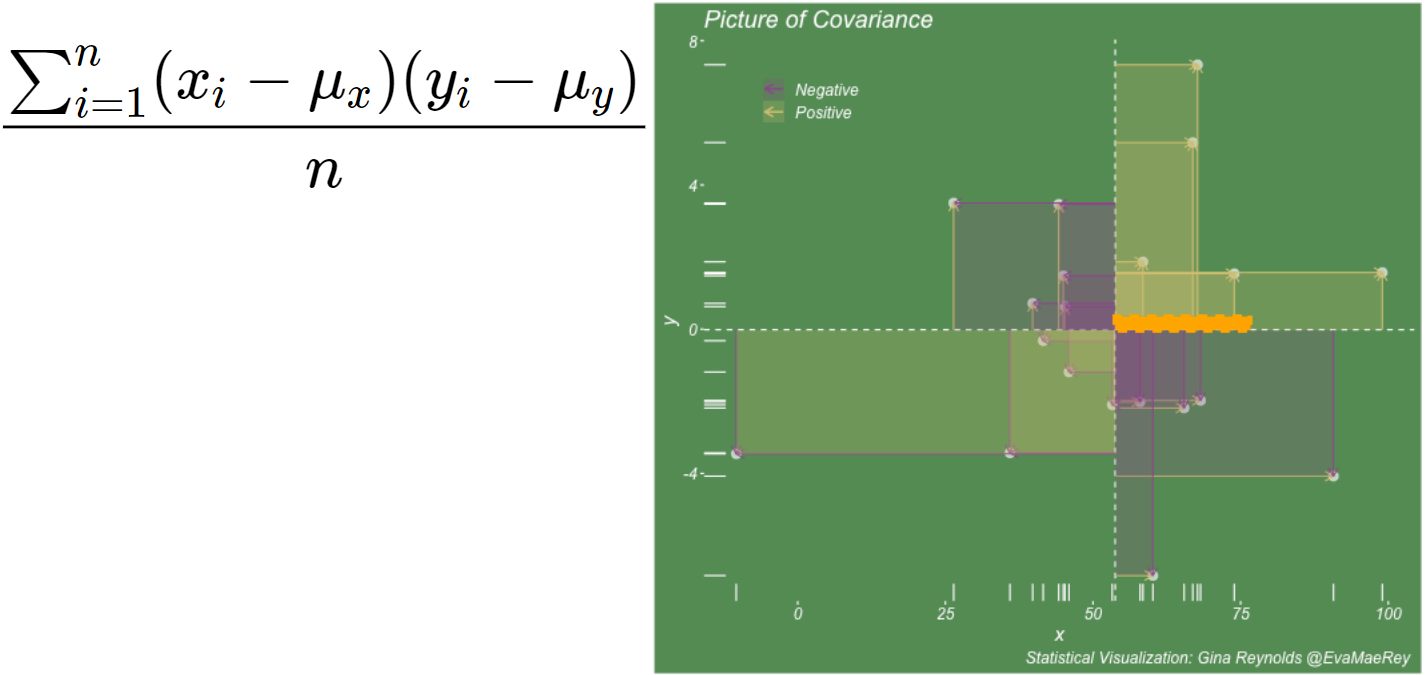

<Axes: >

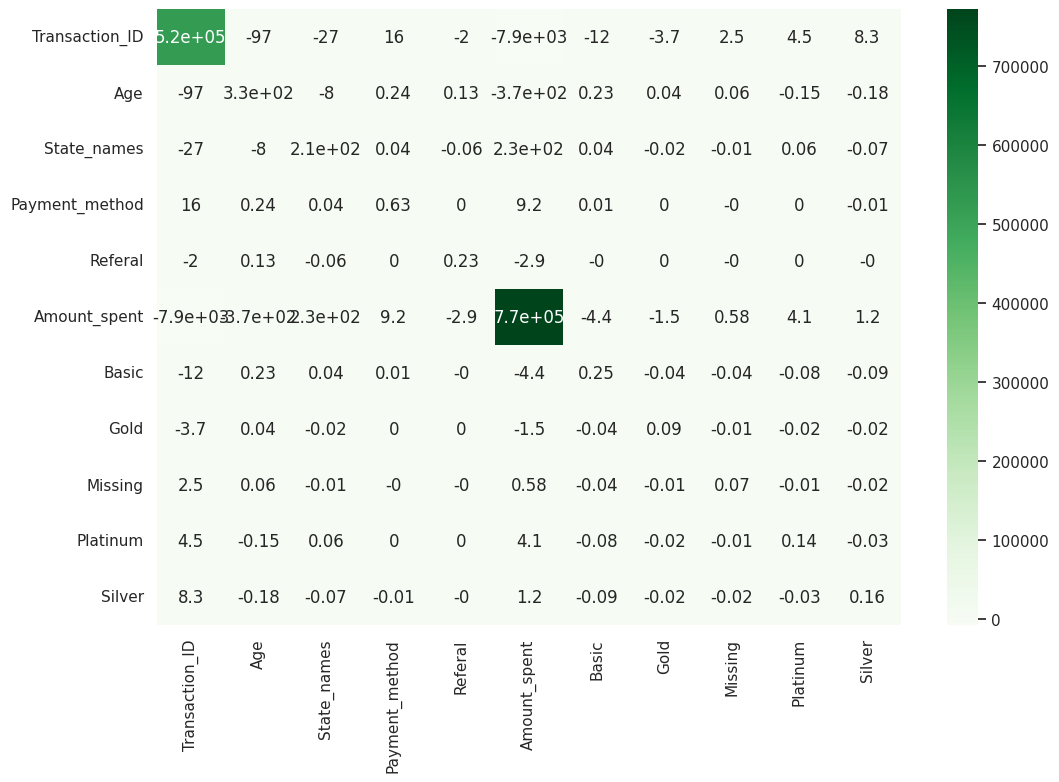

In [26]:
df.cov(numeric_only=True)
import seaborn as sb
corr = df.cov(numeric_only=True).round(2)
sb.set (rc = {'figure.figsize':(12, 8)})
sb.heatmap(corr, cmap="Greens", annot=True)

#Correlation overcomes the lack of scale dependency that is present in covariance by standardizing the values. This standardization converts the values to the same scale.

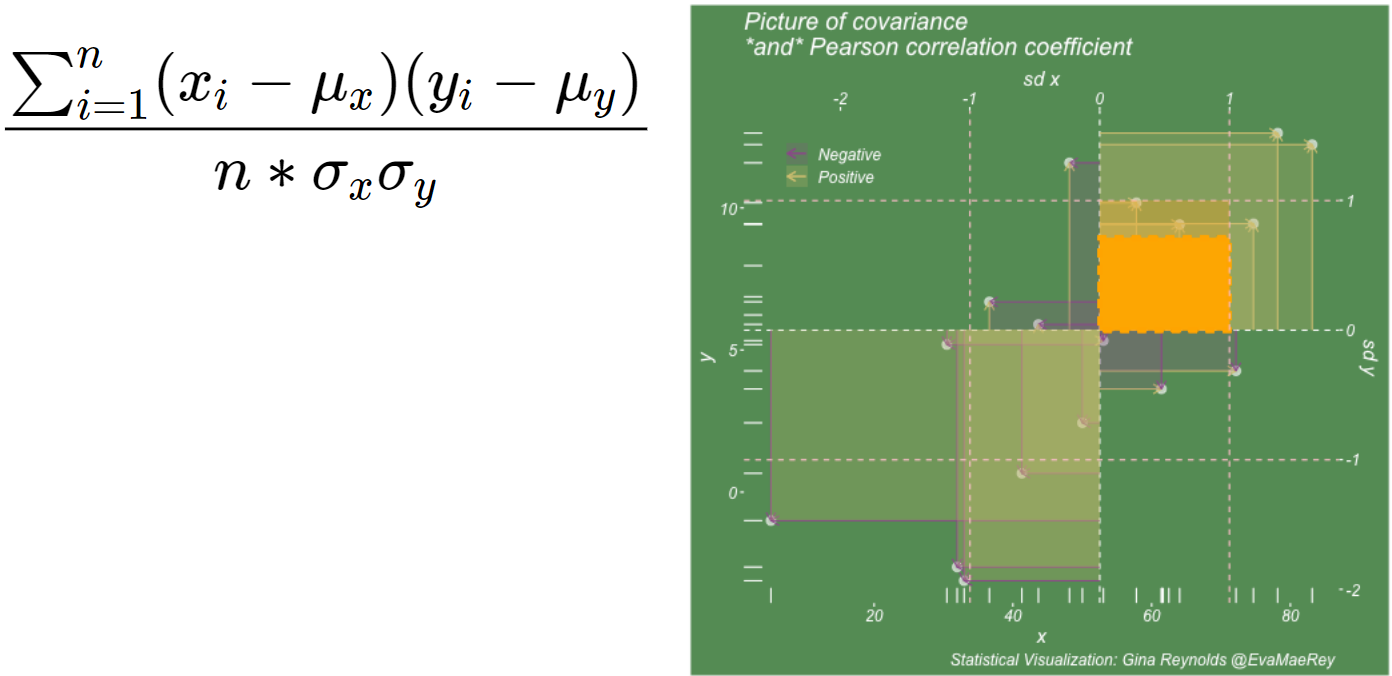
 Correlation is measured on a normalized scale from -1 to 1, with a value of 0 indicating no correlation.

In [27]:
df.corr(numeric_only=True)


,Transaction_ID,Age,State_names,Payment_method,Referal,Amount_spent,Basic,Gold,Missing,Platinum,Silver
Transaction_ID,1.000000,-0.007312,-0.002586,0.028232,-0.005911,-0.012464,-0.032066,-0.017405,0.012836,0.016285,0.028961
Age,-0.007312,1.000000,-0.030652,0.016497,0.014409,-0.022907,0.025308,0.008029,0.011282,-0.021757,-0.024612
State_names,-0.002586,-0.030652,1.000000,0.003618,-0.009253,0.018381,0.005196,-0.004763,-0.002072,0.011122,-0.012231
Payment_method,0.028232,0.016497,0.003618,1.000000,0.013252,0.013069,0.015678,0.005988,-0.002127,0.000766,-0.023477
Referal,-0.005911,0.014409,-0.009253,0.013252,1.000000,-0.006830,-0.017276,0.029051,-0.010668,0.009128,-0.001579
Amount_spent,-0.012464,-0.022907,0.018381,0.013069,-0.006830,1.000000,-0.009958,-0.005892,0.002402,0.012444,0.003388
Basic,-0.032066,0.025308,0.005196,0.015678,-0.017276,-0.009958,1.000000,-0.299258,-0.266919,-0.419916,-0.448078
Gold,-0.017405,0.008029,-0.004763,0.005988,0.029051,-0.005892,-0.299258,1.000000,-0.096241,-0.151405,-0.161560
Missing,0.012836,0.011282,-0.002072,-0.002127,-0.010668,0.002402,-0.266919,-0.096241,1.000000,-0.135044,-0.144101
Platinum,0.016285,-0.021757,0.011122,0.000766,0.009128,0.012444,-0.419916,-0.151405,-0.135044,1.000000,-0.226699


<Axes: >

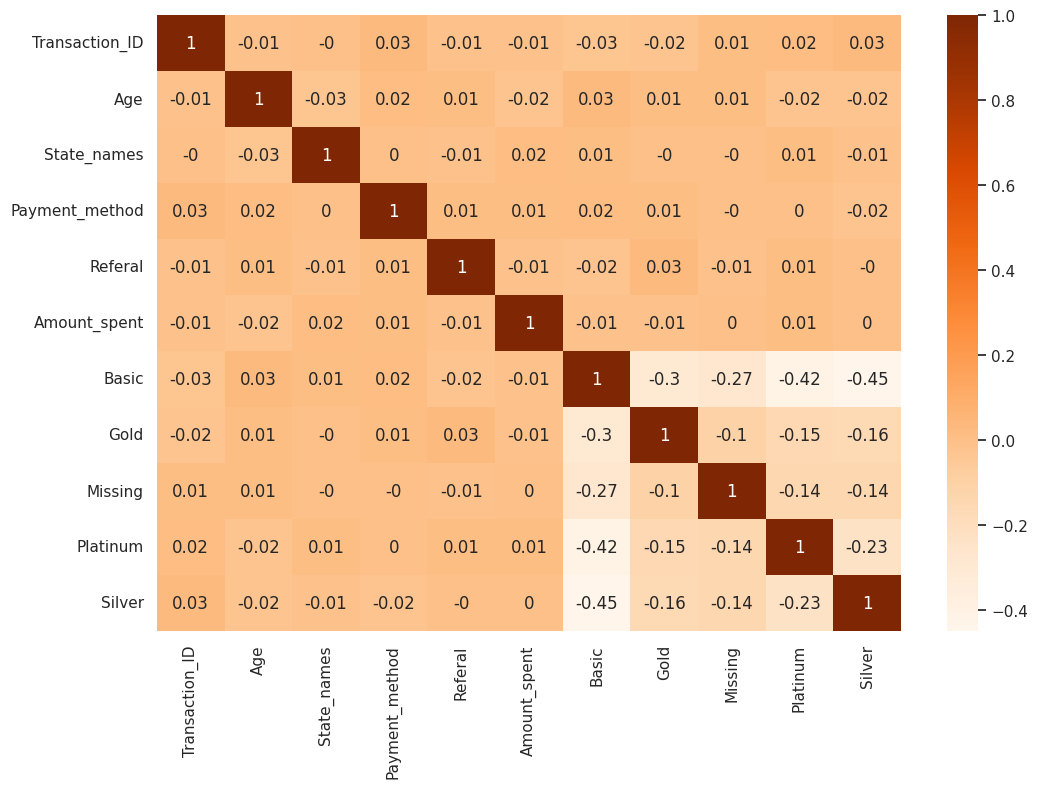

In [28]:
# visualise correlation
import seaborn as sb
corr = df.corr(numeric_only=True).round(2)
sb.set (rc = {'figure.figsize':(12, 8)})
sb.heatmap(corr, cmap="Oranges", annot=True)

#TASK 4

##MinMaxScaler scales the data to a fixed range, typically between 0 and 1. On the other hand, StandardScaler rescales the data to have a mean of 0 and a standard deviation of 1.


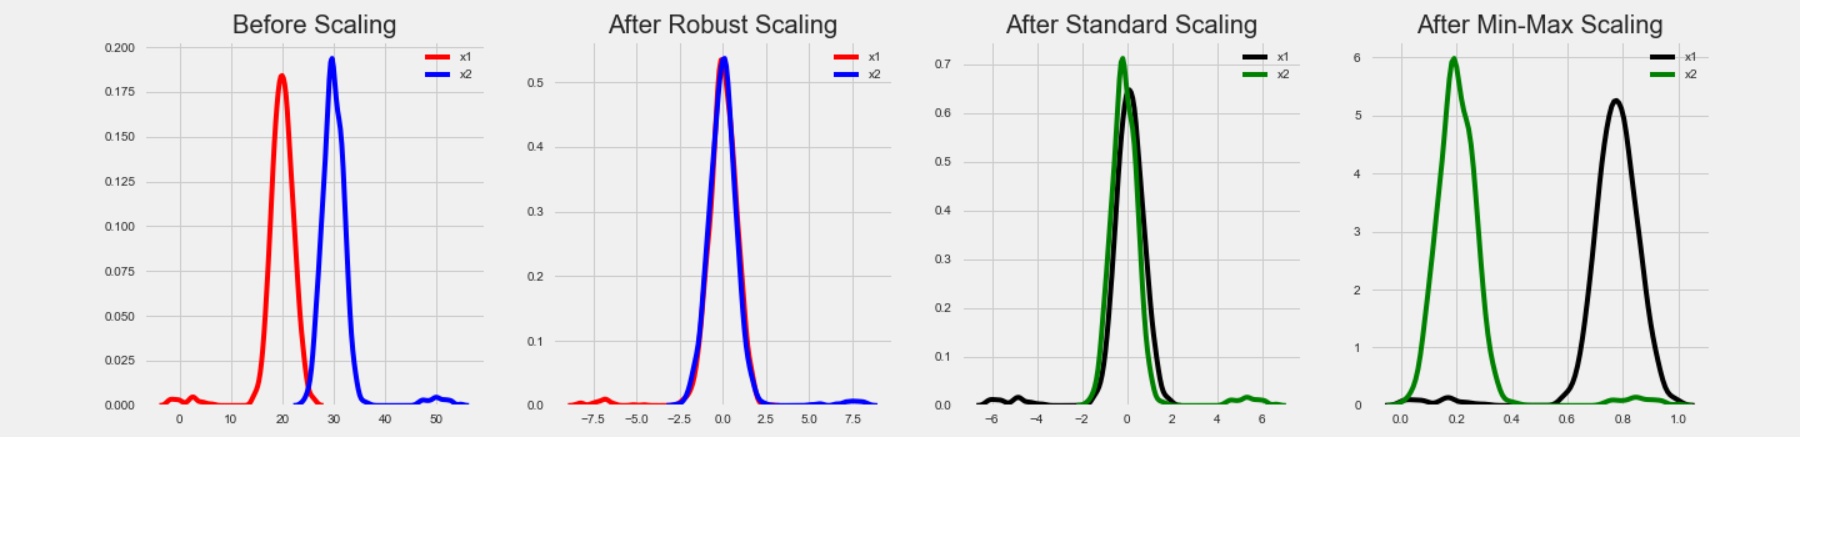

In [29]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df_min_max = df.copy()

df_min_max[df_min_max.select_dtypes(include=['float64','int64']).columns] =minmax_scaler.fit_transform(df_min_max.select_dtypes(include=['float64','int64']))
print("Scaled Dataset Using Min Max Scaler")
df_min_max.head()



Scaled Dataset Using Min Max Scaler


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Basic,Gold,Missing,Platinum,Silver
1,1/1/2019,0.000000,Male,0.539683,Single,0.244898,self-employed,0.5,0.0,0.180777,True,False,False,False,False
2,1/1/2019,0.000400,Male,0.761905,Married,0.612245,workers,0.0,1.0,0.523872,True,False,False,False,False
3,1/1/2019,0.000801,NaN,0.047619,Single,0.918367,workers,0.5,1.0,0.399514,False,False,False,True,False
4,1/1/2019,0.001201,Male,0.190476,Single,0.122449,self-employed,0.5,0.0,NaN,True,False,False,False,False
5,1/3/2019,0.001601,Male,0.888889,Single,0.204082,Employees,0.0,1.0,0.974209,True,False,False,False,False


In [30]:
df_std = df.copy()
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_std[df_std.select_dtypes(include=['float64','int64']).columns] =std_scaler.fit_transform(df_std.select_dtypes(include=['float64','int64']))

print("Scaled Dataset Using StandardScaler")
df_std.head()

Scaled Dataset Using StandardScaler


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Basic,Gold,Missing,Platinum,Silver
1,1/1/2019,-1.723765,Male,0.129504,Single,-0.836083,self-employed,0.324298,-1.366351,-0.995399,True,False,False,False,False
2,1/1/2019,-1.722383,Male,0.897388,Married,0.420388,workers,-0.936918,0.731876,0.174944,True,False,False,False,False
3,1/1/2019,-1.721002,NaN,-1.570810,Single,1.467447,workers,0.324298,0.731876,-0.249256,False,False,False,True,False
4,1/1/2019,-1.719620,Male,-1.077170,Single,-1.254906,self-employed,0.324298,-1.366351,NaN,True,False,False,False,False
5,1/3/2019,-1.718239,Male,1.336179,Single,-0.975691,Employees,-0.936918,0.731876,1.711105,True,False,False,False,False
